# Time Series Analysis (TSA) and Forecasting Models (TFS)

Time Series Analysis (TSA) is a method to extract meaningful statistics and other characteristics
of the data. Time Series Forecasting (TSF) is the use of a model to predict future values based on
previously observed values.

Our first data is GOOGLE stocks rates from 2006 to 2018. We will use the “Date” column to be our
table index. Pandas support in TSA.

In [4]:
import os
import math
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from numpy.random import normal, seed
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("google.csv", index_col="Date", parse_dates=["Date"])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800


## Indexing, Sampling, Visualization

In [6]:
df["2020":]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1348.410034,1368.680054,1346.489990,1368.680054,1368.680054,1363900
2020-01-03,1348.000000,1373.750000,1347.319946,1361.520020,1361.520020,1170400
2020-01-06,1351.630005,1398.319946,1351.000000,1397.810059,1397.810059,2338400
2020-01-07,1400.459961,1403.500000,1391.560059,1395.109985,1395.109985,1716500
2020-01-08,1394.819946,1411.849976,1392.630005,1405.040039,1405.040039,1765700
...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800


In [7]:
df["2020-12":]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,1766.660034,1821.719971,1763.030029,1795.359985,1795.359985,1867500
2020-12-02,1795.359985,1832.739990,1785.170044,1824.969971,1824.969971,1471200
2020-12-03,1820.540039,1843.829956,1817.000000,1821.839966,1821.839966,1236400
2020-12-04,1820.219971,1829.500000,1813.589966,1823.760010,1823.760010,1027200
2020-12-07,1815.550049,1829.290039,1803.040039,1817.030029,1817.030029,1114400
...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800


Text(0.5, 1.0, 'Google Open Stocks Monthly Values')

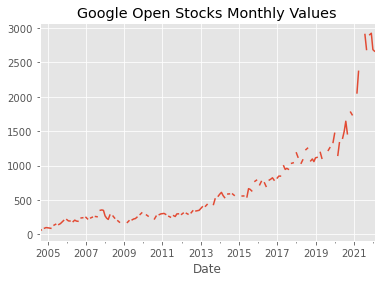

In [8]:
df["Open"].asfreq("M").plot()
plt.title("Google Open Stocks Monthly Values")

Text(0.5, 1.0, 'Google High Stocks Daily Values')

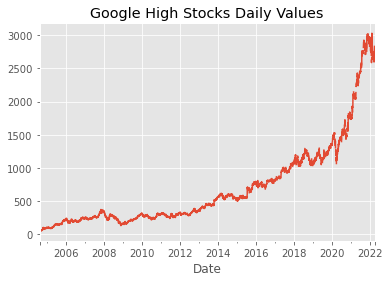

In [9]:
df["High"].asfreq("D").plot()
plt.title("Google High Stocks Daily Values")

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

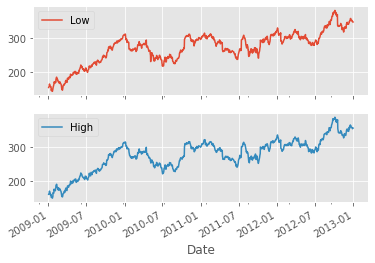

In [10]:
df["2009":"2012"][["Low", "High"]].plot(subplots=True)

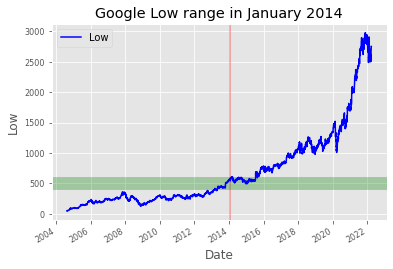

In [11]:
ax = df[["Low"]].plot(color='blue',fontsize=8)
ax.set_xlabel('Date')
ax.set_ylabel('Low')
# add markers
ax.axvspan('2014-01-01','2014-01-31', color='red', alpha=0.3)
ax.axhspan(400, 600, color='green',alpha=0.3)
plt.title("Google Low range in January 2014")
plt.show()

Text(0.5, 1.0, 'Kernel Density Estimator')

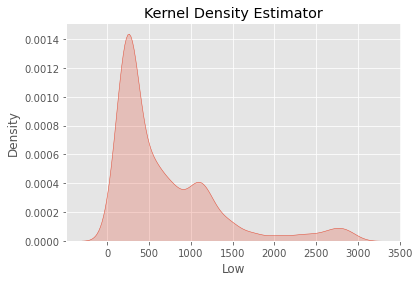

In [12]:
sns.kdeplot(df['Low'], shade=True)
plt.title("Kernel Density Estimator")

## Timestamps, Periods

Timestamps are used to represent a point in time. Periods represent an interval in time. Periods
can used to check if a specific event in the given period. They can also be converted to each other’s
form.


In [13]:
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [14]:
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [15]:
if period.start_time < timestamp < period.end_time:
    print("Period include the timestamp")
else:
    print("Period does not include the timestamp")

Period include the timestamp


In [16]:
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [17]:
period.to_timestamp(freq='H', how='start')

Timestamp('2017-01-01 00:00:00')

In [18]:
pd.date_range(start='1/1/18', end='1/9/18')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.date_range(start='1/1/18', end='1/1/19', freq='M')

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [20]:
pd.date_range(end='1/4/2014', periods=8)

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

In [22]:
dates = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
dates

,year,month,day
0,2015,2,4
1,2016,3,5


In [23]:
pd.to_datetime(dates)

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

## Components of Time Series 

Time series data consist of four components:
1. <b>Trend Component:</b> moves up or down in a reasonably predictable pattern over a long period
(i.e, monotonic).
2. <b>Seasonality Component:</b> regular and periodic and repeats itself over a specific period such
as a day, week, month (season).
3. <b>Random Component:</b> is the variation that is erratic or residual and does not fall under any
of the above classifications.

### Time Resampling

Examining stock price data for every single day isn’t of much use to financial institutions, who are

more interested in spotting market trends. To make it easier, we use a process called time resam-
pling to aggregate data into a defined time period, such as by month or by quarter. Institutions

can then see an overview of stock prices and make decisions according to these trends.

In [24]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [25]:
df.resample(rule = 'A').mean() # A - end of a year

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,75.791855,77.427480,74.550881,75.976614,75.976614,1.813565e+07
2005-12-31,139.004739,140.639071,137.290088,139.018562,139.018562,2.135695e+07
2006-12-31,206.155438,208.419296,203.364480,205.798448,205.798448,1.696810e+07
2007-12-31,269.683608,272.360707,266.764753,269.644864,269.644864,1.086714e+07
2008-12-31,233.369932,237.408059,228.564869,232.658667,232.658667,1.263058e+07
2009-12-31,219.704962,222.216045,217.452512,220.064231,220.064231,7.011298e+06
2010-12-31,268.424416,270.744831,265.659627,268.079627,268.079627,6.353451e+06
2011-12-31,284.870722,287.470307,282.086252,284.771855,284.771855,6.150283e+06
2012-12-31,321.716956,324.462722,318.796357,321.729969,321.729969,5.203541e+06


### Time Shifting

Sometimes, we may need to shift or move the data forward or backwards in time. This shifting is
done along a time index by the desired number of time-frequency increments.

In [26]:
df.shift(1).head() # forward shifting in 1 unit time

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0
2004-08-23,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0
2004-08-24,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0
2004-08-25,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0


In [27]:
df.shift(-1).head() # backward shifting in 1 unit time

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0
2004-08-20,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0
2004-08-23,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0
2004-08-24,52.532532,54.054054,51.991993,53.053055,53.053055,9188602.0
2004-08-25,52.527527,54.029030,52.382381,54.009010,54.009010,7094898.0


### Missing Values in TSA

The imputation process is known and familiar to us from the previous course. Most of the cases
we are using the mean / median / any statistical measure, to fill the missing value. In TSA, the
average may not reflect the actual value we will need in specific time (to).
Basic Imputation Techniques: 1. ‘ffill’ - Replace NaN with the last observed value. 2. ‘bfill’ -
Replace NaN with the next observed value.

In [28]:
shifted = df.shift(1).head()
shifted

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0
2004-08-23,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0
2004-08-24,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0
2004-08-25,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0


In [29]:
shifted.fillna(method='ffill',inplace=True) # do nothing
shifted

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0
2004-08-23,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0
2004-08-24,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0
2004-08-25,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0


In [30]:
shifted.fillna(method='bfill',inplace=True)
shifted

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0
2004-08-20,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0
2004-08-23,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0
2004-08-24,55.430431,56.796799,54.579578,54.754753,54.754753,18256126.0
2004-08-25,55.675674,55.855858,51.836838,52.487488,52.487488,15247337.0


# **Time Series Forecasting**

Time Series forecasting is the process of using a statistical model to predict future values of a time series based on past results.

### Some Use Cases
- To predict the number of incoming or churning customers.
- To explaining seasonal patterns in sales.
- To detect unusual events and estimate the magnitude of their effect.
- To Estimate the effect of a newly launched product on number of sold units.

### What is LSTM?

LSTM stands for Short Term Long Term Memory. It is a model or an architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have “short-term memory” in that they use persistent past information for use in the current neural network. Essentially, the previous information is used in the current task. This means that we do not have a list of all of the previous information available for the neural node.

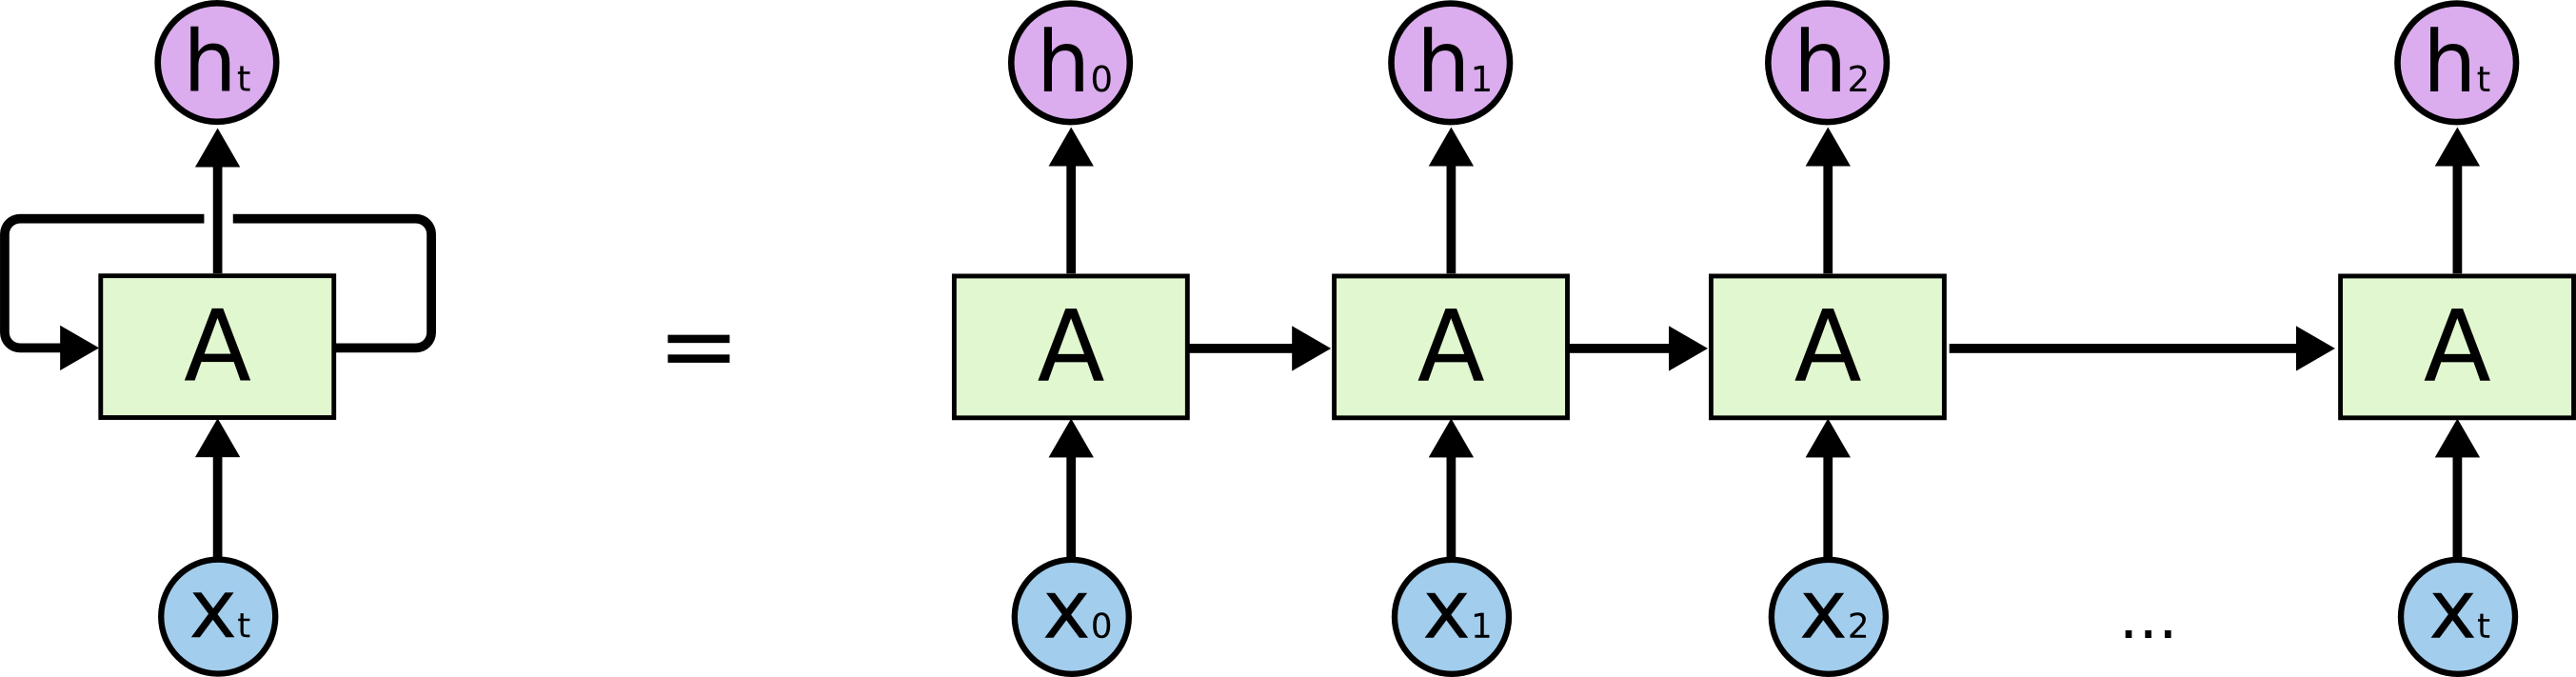